In [8]:
import torchvision
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
model.cuda()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
        )
  

In [11]:
from PIL import Image

from torchvision import transforms as T

In [13]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motor', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [14]:
labels = ["pedestrian","person","car","van","bus","truck","motor","bicycle","awning-tricycle","tricycle"]

In [10]:
import torch

In [ ]:
model

In [94]:

torch.save(model.state_dict(),"tmp")

In [23]:
labels.index('p')

ValueError: 'p' is not in list

In [52]:
normalize = T.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])

In [16]:
def get_prediction(img_path, threshold,s=512):
    img = Image.open(img_path) # Load the image
    img = img.resize((s,s))
    transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform
    img = transform(img).cuda() # Apply the transform to the image
    pred = model([img]) # Pass the image to the model
    print(pred)

In [75]:
def get_prediction(img_path, threshold,s=512):
    img = Image.open(img_path) # Load the image
    img = img.resize((s,s))
    transform = T.Compose([T.ToTensor()]) # Defing PyTorch Transform
    img = transform(img) # Apply the transform to the image
    pred = model([img]) # Pass the image to the model
    print(pred)
    
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].cpu().numpy())] # Get the Prediction Score
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return pred_boxes, pred_class

In [ ]:
model()

In [17]:
a=get_prediction("data/input/images/0000026_01000_d_0000026.jpg",0.5)

[{'boxes': tensor([[ 20.3257, 174.2323,  85.3805, 232.2495],
        [ 23.2005,  26.3494,  80.3811,  81.7808],
        [191.6039,   6.9982, 242.9273,  58.5252],
        [ 26.0185, 113.4558,  89.5671, 167.4349],
        [  8.9612,   1.1628,  69.6591,  48.8051],
        [200.6093, 176.7901, 268.2253, 241.3092],
        [195.4950,  97.4508, 255.1372, 149.4001],
        [321.0230, 148.9724, 377.1652, 200.8580],
        [201.4510, 235.7550, 276.5199, 301.5254],
        [195.8938,  84.4785, 256.7887, 149.9138],
        [197.6210,  57.9156, 250.7485, 107.1812],
        [218.2784, 389.2233, 288.2231, 459.1807],
        [200.1374, 176.9454, 270.2963, 244.2713],
        [327.6307, 284.2357, 400.9787, 359.6995],
        [377.8931,  51.4082, 399.0456,  81.0480],
        [ 19.4700, 248.8674,  84.0253, 306.5301],
        [203.2155, 235.6478, 275.4478, 296.2552],
        [239.4365, 476.1963, 308.0065, 511.7535],
        [196.3506, 234.8833, 276.2866, 302.4405],
        [318.8386, 147.5798, 379.9019, 

In [77]:
def decode_pred_bb(pred):
    results = []
    for bb,lab in zip(pred[0],pred[1]):
        try:
            results.append([labels.index(lab),bb[0][0],bb[0][1],bb[1][0],bb[1][1]])
        except:
            print("no label",lab)
    return results

In [78]:
decode_pred_bb(a)

no label suitcase
no label suitcase


[[2, 20.325665, 174.23228, 85.38051, 232.24951],
 [2, 23.20047, 26.34944, 80.38114, 81.78077],
 [2, 191.6039, 6.998152, 242.92729, 58.525223],
 [2, 26.018496, 113.45582, 89.5671, 167.43492],
 [2, 8.961194, 1.1628344, 69.65908, 48.805107],
 [2, 195.49501, 97.45082, 255.1372, 149.40015],
 [2, 321.023, 148.9724, 377.1652, 200.85799],
 [5, 201.45099, 235.75497, 276.51987, 301.52545],
 [6, 195.89375, 84.47852, 256.78867, 149.91388],
 [2, 197.62096, 57.915585, 250.74849, 107.18119],
 [5, 200.1374, 176.94545, 270.2963, 244.27127],
 [5, 327.63074, 284.2357, 400.9787, 359.69952],
 [1, 377.89313, 51.408176, 399.04562, 81.04803]]

In [79]:
a[1]

['car',
 'car',
 'car',
 'car',
 'car',
 'suitcase',
 'car',
 'car',
 'truck',
 'motor',
 'car',
 'suitcase',
 'truck',
 'truck',
 'person']

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('data/input/images/0000026_01000_d_0000026.jpg')

In [5]:
img.shape

(765, 1360, 3)

In [7]:
img.transpose(2,0,1)

array([[[ 80,  84,  90, ..., 109, 110, 112],
        [134, 135, 137, ..., 111, 112, 114],
        [144, 143, 141, ..., 109, 110, 111],
        ...,
        [ 16,  16,  17, ..., 129, 129, 130],
        [ 16,  16,  17, ..., 129, 129, 130],
        [ 16,  16,  17, ..., 129, 129, 130]],

       [[ 98, 102, 108, ..., 109, 110, 112],
        [152, 153, 155, ..., 111, 112, 114],
        [162, 161, 159, ..., 109, 110, 111],
        ...,
        [ 14,  14,  15, ..., 113, 113, 114],
        [ 14,  14,  15, ..., 113, 113, 114],
        [ 14,  14,  15, ..., 113, 113, 114]],

       [[ 99, 103, 109, ..., 109, 110, 112],
        [153, 154, 156, ..., 111, 112, 114],
        [163, 162, 160, ..., 109, 110, 111],
        ...,
        [ 13,  13,  14, ..., 197, 197, 198],
        [ 13,  13,  14, ..., 197, 197, 198],
        [ 13,  13,  14, ..., 197, 197, 198]]], dtype=uint8)

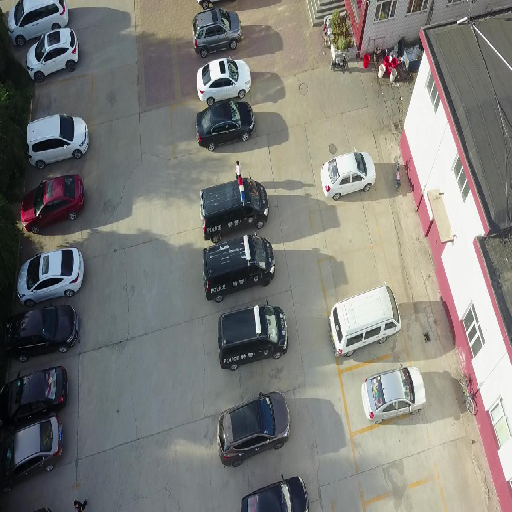

In [69]:
img.resize((512,512))

In [67]:
img.shape

(512, 512)

In [89]:
def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3,s=1024):
 
    boxes, pred_cls = get_prediction(img_path, threshold,s=s) # Get predictions
    img = cv2.imread(img_path) # Read image with cv2
    img = cv2.resize(img,(s,s))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
    for i in range(len(boxes)):
        cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) # Draw Rectangle with the coordinates
        cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) # Write the prediction class
    plt.figure(figsize=(20,30)) # display the output image
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

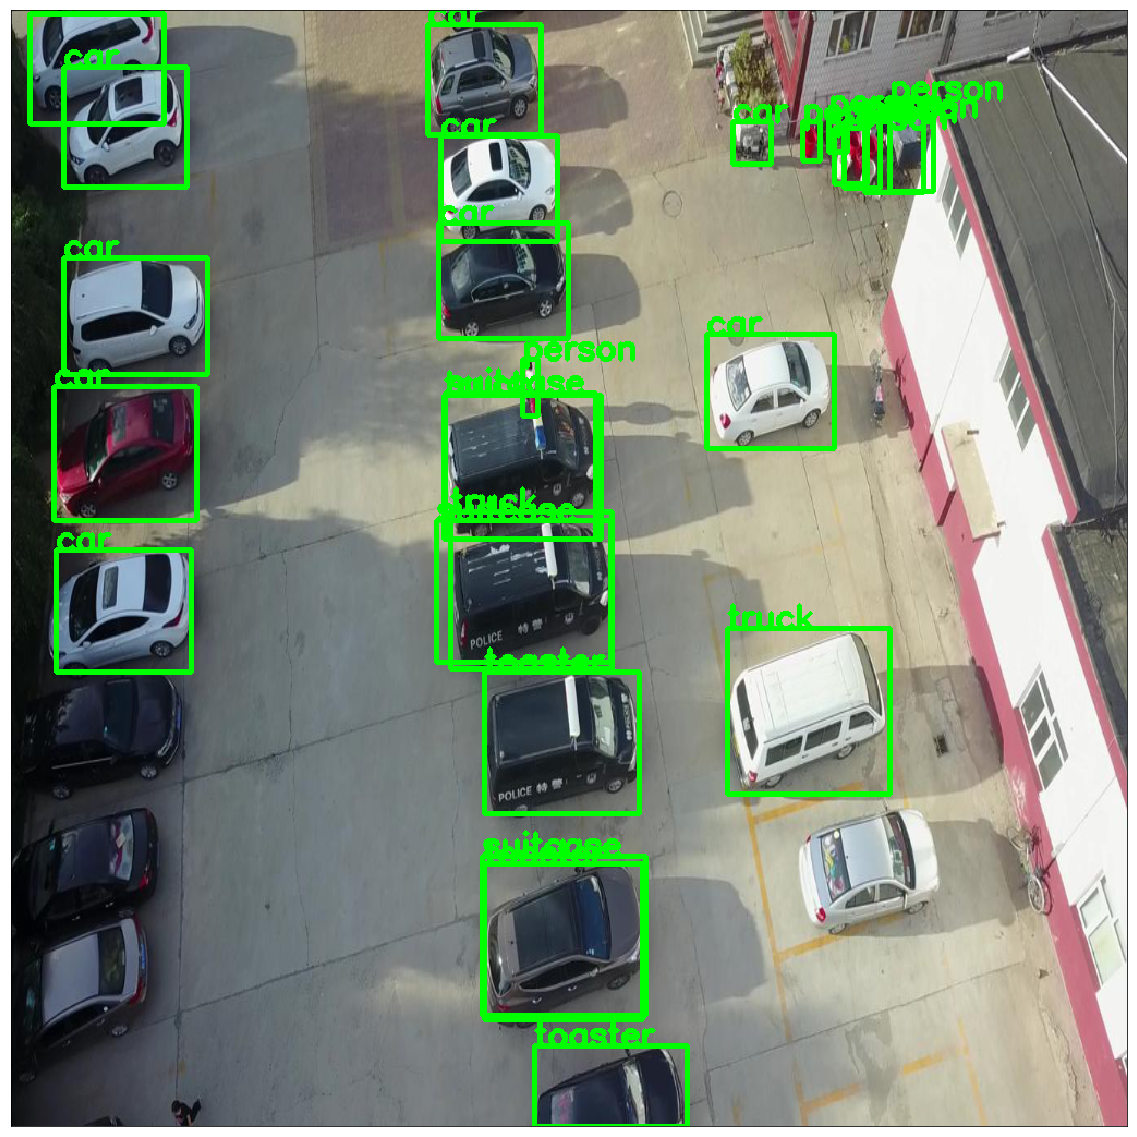

In [90]:
object_detection_api('data/input/images/0000026_01000_d_0000026.jpg',threshold=0.3,text_size=1)

In [36]:
import pandas as pd

In [37]:
data = pd.read_csv('data/input/dev.csv')

In [48]:
data.head()

,image_path,annotations
0,images/0000252_00987_d_0000004.jpg,annotations/0000252_00987_d_0000004.txt
1,images/0000366_04901_d_0000801.jpg,annotations/0000366_04901_d_0000801.txt
2,images/0000281_03401_d_0000643.jpg,annotations/0000281_03401_d_0000643.txt
3,images/0000197_01958_d_0000151.jpg,annotations/0000197_01958_d_0000151.txt
4,images/9999953_00000_d_0000051.jpg,annotations/9999953_00000_d_0000051.txt


In [39]:
import processor

In [40]:
proc = processor.Processor()

In [44]:
data.iloc[0,0]

'images/0000252_00987_d_0000004.jpg'

In [46]:
proc.input_x(data.iloc[0,0]).shape

(512, 512, 3)

In [50]:
proc.input_y(data.iloc[0,0],data.iloc[0,1]).shape

(32, 32, 15)